In [95]:
import pandas as pd
df=pd.read_csv(r"C:\Users\KARTIK\Downloads\student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [96]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [97]:
import seaborn as sns
df=df.drop(columns="Mjob")

In [98]:
df=df.drop(columns=["Fjob", "reason", "address", "famsize", "Pstatus", "Medu","Fedu", "guardian", "traveltime", "schoolsup","famsup", "paid", "activities", "nursery", "higher", "internet", "romantic", "famrel","freetime" , "goout","Dalc","Walc", "health", "G1", "G2", "G3"])

In [99]:
df

,school,sex,age,studytime,failures,absences
0,GP,F,18,2,0,6
1,GP,F,17,2,0,4
2,GP,F,15,2,3,10
3,GP,F,15,3,0,2
4,GP,F,16,2,0,4
...,...,...,...,...,...,...
390,MS,M,20,2,2,11
391,MS,M,17,1,0,3
392,MS,M,21,1,3,3
393,MS,M,18,1,0,0


In [100]:
df.isnull().any()

school       False
sex          False
age          False
studytime    False
failures     False
absences     False
dtype: bool

In [101]:
df["sex"]

0      F
1      F
2      F
3      F
4      F
      ..
390    M
391    M
392    M
393    M
394    M
Name: sex, Length: 395, dtype: object

In [102]:
import numpy as np
arr=np.array(df["sex"].values)
for i in range(len(arr)):
    if arr[i]=='M':
        arr[i]=1
    else:
        arr[i]=0
df["sex"]=arr


In [103]:
df

,school,sex,age,studytime,failures,absences
0,GP,0,18,2,0,6
1,GP,0,17,2,0,4
2,GP,0,15,2,3,10
3,GP,0,15,3,0,2
4,GP,0,16,2,0,4
...,...,...,...,...,...,...
390,MS,1,20,2,2,11
391,MS,1,17,1,0,3
392,MS,1,21,1,3,3
393,MS,1,18,1,0,0


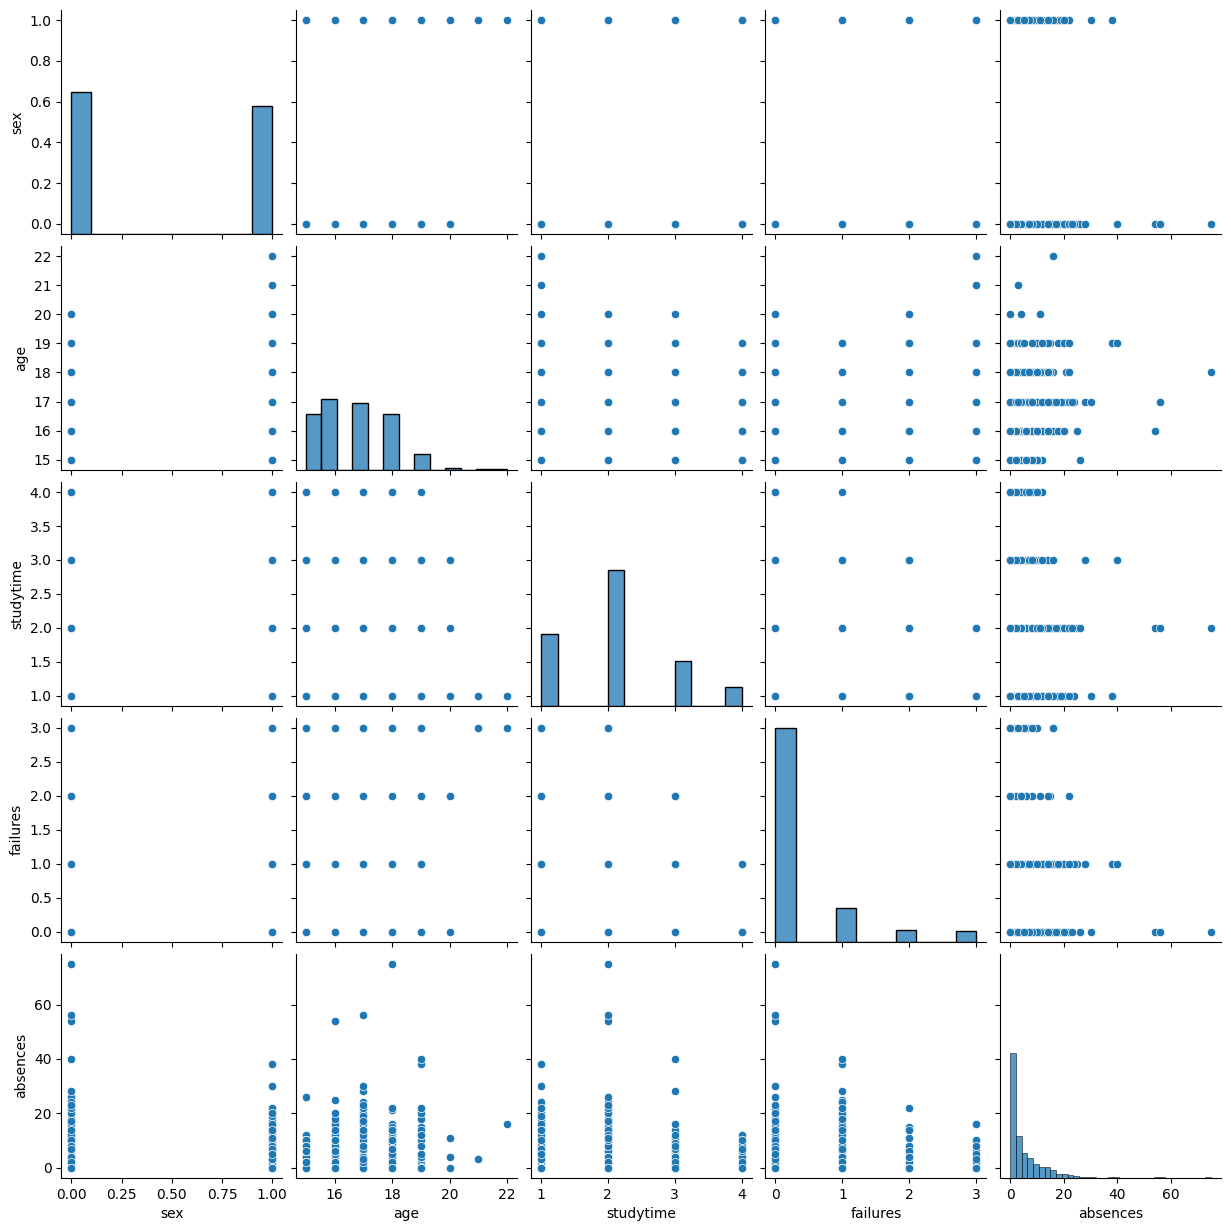

In [104]:
sns.pairplot(df[["sex","age","studytime","failures", "absences"]])

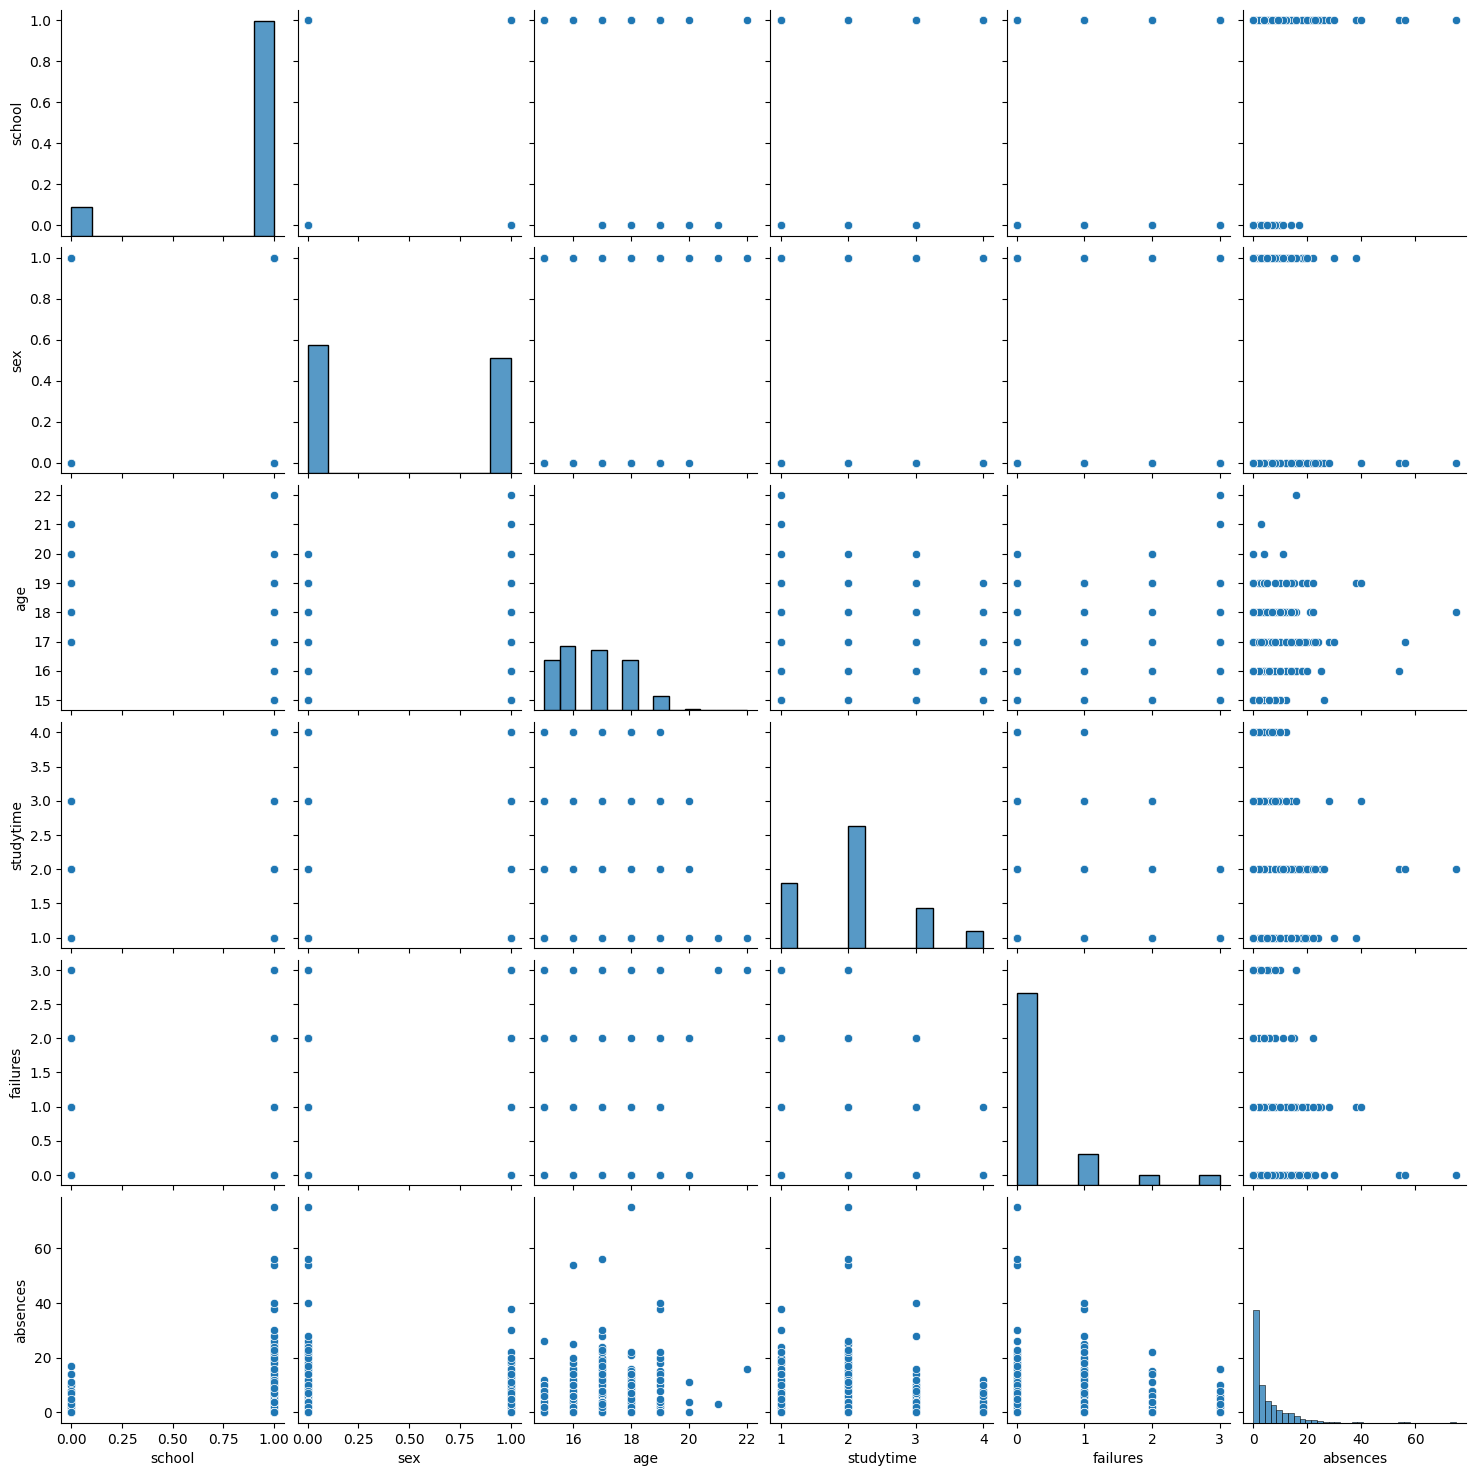

In [105]:
import numpy as np
arr=np.array(df["school"].values)
for i in range(len(arr)):
    if arr[i]=='GP':
        arr[i]=1
    else:
        arr[i]=0
df["school"]=arr
sns.pairplot(df[["school","sex","age","studytime","failures", "absences"]])

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X=df.drop(columns=["failures","sex","school"])
y=df["failures"]
X_train, x_test, y_train,y_test=train_test_split(X,y, random_state=7, test_size=0.2)
accuracy=0
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8607594936708861

<Axes: >

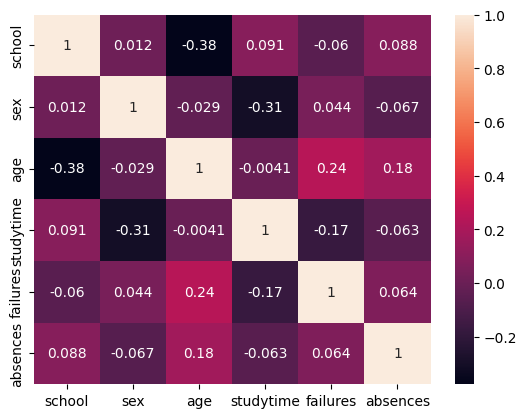

In [113]:
corr_mat=df.corr()
sns.heatmap(corr_mat, annot=True)

In [164]:
from sklearn.neighbors import KNeighborsClassifier
ks=range(2,int(len(X_train)/2))
accuracy_array=[]
accuracy=0
for k in ks:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred=model.predict(x_test)
    accuracy1=accuracy_score(y_pred,y_test)
    accuracy_array.append(accuracy)
    if accuracy1>accuracy:
        accuracy=accuracy1
accuracy

0.8860759493670886

In [173]:
for i in range(len(accuracy_array)):
    if accuracy_array[i]==0.8860759493670886 :
        print(i)
        break
    

32
